In [4]:
import pandas as pd

accData = pd.read_csv('data/day6Data/한국도로교통공단_시도 시군구별 교통사고 통계_20231231.csv', encoding='cp949')

accData.head()

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,988,8,240,1009,82
1,서울,중구,931,3,217,877,100
2,서울,용산구,996,11,261,1077,28
3,서울,성동구,919,6,203,959,59
4,서울,동대문구,1674,10,424,1452,163


# 시도 구군별 교통사고 데이터 확인하기

In [5]:
accData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      230 non-null    object
 1   시군구     230 non-null    object
 2   사고건수    230 non-null    int64 
 3   사망자수    230 non-null    int64 
 4   중상자수    230 non-null    int64 
 5   경상자수    230 non-null    int64 
 6   부상신고자수  230 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 12.7+ KB


1. 시도별 사망자수, 중상자수, 경상자수, 부상신고자수, 부상자수 평균

In [7]:
accData.columns

Index(['시도', '시군구', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수'], dtype='object')

In [11]:
sidomean = accData.groupby('시도', as_index=False)[['사고건수','사망자수', '중상자수', '경상자수', '부상신고자수']].mean()
sidomean

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,강원,337.722222,7.777778,105.777778,366.055556,47.833333
1,경기,1714.967742,16.193548,410.451613,1910.322581,202.903226
2,경남,617.888889,13.166667,245.111111,554.555556,55.777778
3,경북,468.565217,11.434783,162.956522,471.913043,43.217391
4,광주,1394.400000,9.600000,218.800000,1781.200000,98.000000
5,대구,1208.888889,9.555556,298.333333,1285.333333,126.111111
6,대전,1479.600000,12.200000,311.800000,1740.600000,73.400000
7,부산,687.687500,6.437500,207.437500,670.562500,57.437500
8,서울,1352.440000,7.200000,312.360000,1362.600000,141.600000
9,세종,1166.000000,13.000000,316.000000,1026.000000,382.000000


* 사고건수 평균 기준 상위 5위 도시에 대한 중상자수, 경상자수, 부상신고자수 평균

In [14]:
# 데이터 셋 설정
# 차트 작성
top5 = sidomean.sort_values('사고건수', ascending=False).head()
top5

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
14,제주,1975.000000,22.500000,569.000000,2069.000000,304.000000
1,경기,1714.967742,16.193548,410.451613,1910.322581,202.903226
6,대전,1479.600000,12.200000,311.800000,1740.600000,73.400000
4,광주,1394.400000,9.600000,218.800000,1781.200000,98.000000
8,서울,1352.440000,7.200000,312.360000,1362.600000,141.600000


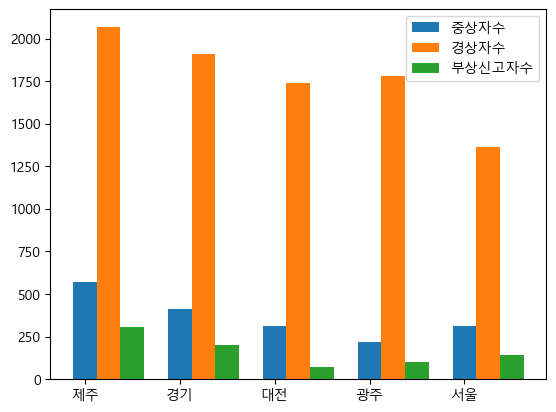

In [21]:
# 새로 막대 차트 비교
import matplotlib.pyplot as plt
import numpy as np      # 데이터가 많은것을 비교할떄 시용

plt.rc('font',family='malgun gothic')

pos = np.arange(len(top5['시도']))
plt.bar(pos,top5['중상자수'], label='중상자수', width=0.25)
plt.bar(pos+0.25,top5['경상자수'], label='경상자수', width=0.25)
plt.bar(pos+0.5,top5['부상신고자수'], label='부상신고자수', width=0.25)

# plt.barh(pos,top5['중상자수'], label='중상자수', height=0.25)

plt.xticks(pos,top5['시도'])

plt.legend()

plt.show()

<Axes: xlabel='시도'>

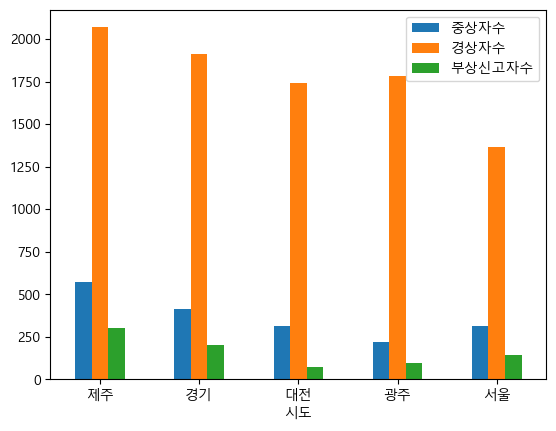

In [24]:
# pandas 이용
top5.plot(kind='bar', x='시도', rot=0, y=['중상자수','경상자수','부상신고자수'])

* 사망자수 평균 비율이 가장 많은 도시

In [25]:
sidomean.head()

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,강원,337.722222,7.777778,105.777778,366.055556,47.833333
1,경기,1714.967742,16.193548,410.451613,1910.322581,202.903226
2,경남,617.888889,13.166667,245.111111,554.555556,55.777778
3,경북,468.565217,11.434783,162.956522,471.913043,43.217391
4,광주,1394.400000,9.600000,218.800000,1781.200000,98.000000


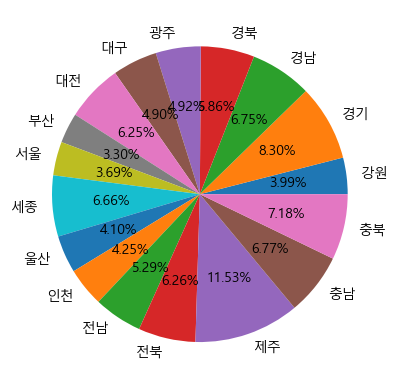

In [30]:
# exp = []
plt.pie(sidomean['사망자수'], labels=sidomean['시도'], autopct = '%.2f%%')
plt.show()

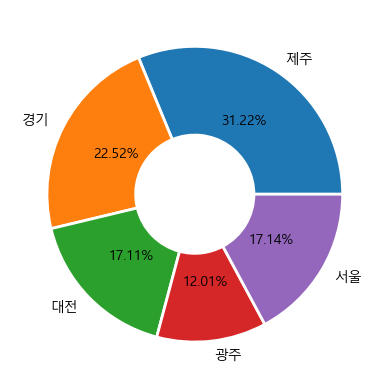

In [40]:
exp = [0,1,0,0,0,0]
plt.pie(top5['중상자수'], labels=top5['시도'], autopct='%.2f%%', wedgeprops={'width':0.6, 'edgecolor':'w', 'linewidth':2});
# explode